# Install Apache Spark 3
Open the google colab notebook and use below set of commands to install Java 8, download and unzip Apache Spark 3.0.0 and install findpyspark. It shoudl take only few minutes depending on your connection speed.

In [2]:
!apt-get update

# install Java8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
# download spark3.0.0
!wget -q https://apache.mediamirrors.org/spark/spark-3.1.1/spark-3.1.1-bin-hadoop2.7.tgz
# unzip it
!tar xf spark-3.1.1-bin-hadoop2.7.tgz
# install findspark 
!pip install -q findspark

!ls -alh

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://security.ubuntu.com/ubuntu bionic-securi

# Set Environment Variables
Let's add relevant paths to the environment so you can manage multiple versions of spark by pointing to the correct version through environment variables.

In [3]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop2.7"

# Quick Installation Test
Now it is time to test our spark installation and the version of it. We should be able to use Spark 3 version and pyspark.

In [4]:
import findspark
findspark.init()
from pyspark.sql import SparkSession


spark = SparkSession.builder.master("local[*]").getOrCreate()

# Test the spark
df_test = spark.createDataFrame([{"hello": "world"} for x in range(1000)])
df_test.show(3, False)

+-----+
|hello|
+-----+
|world|
|world|
|world|
+-----+
only showing top 3 rows



In [5]:
spark

credits for the installation process : https://medium.com/analytics-vidhya/getting-started-spark3-0-0-with-google-colab-9796d350d78

# Download and Preprocess Chicago's Reported Crime Data

In [5]:
!wget https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
!ls -lah

--2021-05-04 08:32:05--  https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.140.205, 52.206.68.26, 52.206.140.199
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [  <=>               ]   1.61G  3.14MB/s    in 8m 59s  

2021-05-04 08:41:05 (3.05 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [1726397542]

total 1.9G
drwxr-xr-x  1 root root 4.0K May  4 08:32  .
drwxr-xr-x  1 root root 4.0K May  4 08:28  ..
drwxr-xr-x  4 root root 4.0K Apr 21 13:38  .config
-rw-r--r--  1 root root 1.7G May  3 11:07 'rows.csv?accessType=DOWNLOAD'
drwxr-xr-x  1 root root 4.0K Apr 21 13:39  sample_data
drwxr-xr-x 13 1000 1000 4.0K Feb 22 02:44  spark-3.1.1-bin-hadoop2.7
-rw-r--r--  1 root root 214M Feb 22 02:45  spark-3.1.1-b

In [8]:
!mv rows.csv?accessType=DOWNLOAD reported-crimes.csv

In [9]:
!ls -alh

total 1.9G
drwxr-xr-x  1 root root 4.0K May  4 08:43 .
drwxr-xr-x  1 root root 4.0K May  4 08:28 ..
drwxr-xr-x  4 root root 4.0K Apr 21 13:38 .config
-rw-r--r--  1 root root 1.7G May  3 11:07 reported-crimes.csv
drwxr-xr-x  1 root root 4.0K Apr 21 13:39 sample_data
drwxr-xr-x 13 1000 1000 4.0K Feb 22 02:44 spark-3.1.1-bin-hadoop2.7
-rw-r--r--  1 root root 214M Feb 22 02:45 spark-3.1.1-bin-hadoop2.7.tgz


https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2

https://chrispfchung.github.io/import%20data/pyspark-by-example/

https://datascienceplus.com/spark-dataframes-exploring-chicago-crimes/

https://github.com/ernest-kiwele/chicago-crime-analysis-apache-spark/blob/master/spark-ml/chicago-crime-data-on-spark.ipynb



In [10]:
from pyspark.sql.functions import to_timestamp, lit, col

rc = spark.read.csv('reported-crimes.csv', header=True)\
  .withColumn('Date', to_timestamp(col('Date'), 'MM/dd/yyyy hh:mm:ss a'))\
  .filter(col('Date') <= lit('2018-11-11'))
rc.select('ID', 'Case Number', 'Date', 'Primary Type', 'Description').show(5)

+--------+-----------+-------------------+------------+--------------------+
|      ID|Case Number|               Date|Primary Type|         Description|
+--------+-----------+-------------------+------------+--------------------+
|10224738|   HY411648|2015-09-05 13:30:00|     BATTERY|DOMESTIC BATTERY ...|
|10224739|   HY411615|2015-09-04 11:30:00|       THEFT|      POCKET-PICKING|
|11646166|   JC213529|2018-09-01 00:01:00|       THEFT|           OVER $500|
|10224740|   HY411595|2015-09-05 12:45:00|   NARCOTICS|POSS: HEROIN(BRN/...|
|10224741|   HY411610|2015-09-05 13:00:00|     ASSAULT|              SIMPLE|
+--------+-----------+-------------------+------------+--------------------+
only showing top 5 rows



# Schema
in production, explicitely defining the schema is recommended

In [11]:
rc.printSchema()
# or rc.dtypes

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [12]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, BooleanType, TimestampType, DoubleType

# rc.columns
labels = [
        ('ID', StringType()),
        ('Case Number', StringType()),
        ('Date', TimestampType()),
        ('Block', StringType()),
        ('IUCR', StringType()),
        ('Primary Type', StringType()),
        ('Description', StringType()),
        ('Location Description', StringType()),
        ('Arrest', StringType()),
        ('Domestic', BooleanType()),
        ('Beat', StringType()),
        ('District', StringType()),
        ('Ward', StringType()),
        ('Community Area', StringType()),
        ('FBI Code', StringType()),
        ('X Coordinate', StringType()),
        ('Y Coordinate', StringType()),
        ('Year', IntegerType()),
        ('Updated On', StringType()),
        ('Latitude', DoubleType()),
        ('Longitude', DoubleType()),
        ('Location', StringType())
        ]
     
schema = StructType([ StructField (x[0], x[1], True) for x in labels]) 
schema

StructType(List(StructField(ID,StringType,true),StructField(Case Number,StringType,true),StructField(Date,TimestampType,true),StructField(Block,StringType,true),StructField(IUCR,StringType,true),StructField(Primary Type,StringType,true),StructField(Description,StringType,true),StructField(Location Description,StringType,true),StructField(Arrest,StringType,true),StructField(Domestic,BooleanType,true),StructField(Beat,StringType,true),StructField(District,StringType,true),StructField(Ward,StringType,true),StructField(Community Area,StringType,true),StructField(FBI Code,StringType,true),StructField(X Coordinate,StringType,true),StructField(Y Coordinate,StringType,true),StructField(Year,IntegerType,true),StructField(Updated On,StringType,true),StructField(Latitude,DoubleType,true),StructField(Longitude,DoubleType,true),StructField(Location,StringType,true)))

In [14]:
rc_with_schema = spark.read.csv('reported-crimes.csv', schema=schema, header=True)
rc_with_schema.select('Arrest', 'Domestic', 'Beat', 'District', 'Ward').show(5)

+------+--------+----+--------+----+
|Arrest|Domestic|Beat|District|Ward|
+------+--------+----+--------+----+
| false|    true|0924|     009|  12|
| false|   false|1511|     015|  29|
| false|    true|0631|     006|   8|
|  true|   false|1412|     014|  35|
| false|    true|1522|     015|  28|
+------+--------+----+--------+----+
only showing top 5 rows



# Manipulating columns 

In [15]:
rc.select('IUCR', 'ID', 'Case Number').show(2)

+----+--------+-----------+
|IUCR|      ID|Case Number|
+----+--------+-----------+
|0486|10224738|   HY411648|
|0870|10224739|   HY411615|
+----+--------+-----------+
only showing top 2 rows



In [16]:
rc.select(rc.Description, rc.Arrest).show(2)

+--------------------+------+
|         Description|Arrest|
+--------------------+------+
|DOMESTIC BATTERY ...| false|
|      POCKET-PICKING| false|
+--------------------+------+
only showing top 2 rows



In [17]:
rc.select(col('Beat'), col('District')).show(2)

+----+--------+
|Beat|District|
+----+--------+
|0924|     009|
|1511|     015|
+----+--------+
only showing top 2 rows



Add a column with name One, with entries all 1s

In [18]:
from pyspark.sql.functions import lit

rc.withColumn('One', lit(1)).select('Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'One').show(3)

+--------------------+--------------------+------+--------+----+---+
|         Description|Location Description|Arrest|Domestic|Beat|One|
+--------------------+--------------------+------+--------+----+---+
|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|  1|
|      POCKET-PICKING|             CTA BUS| false|   false|1511|  1|
|           OVER $500|           RESIDENCE| false|    true|0631|  1|
+--------------------+--------------------+------+--------+----+---+
only showing top 3 rows



Remove the column 'IUCR'

In [19]:
rc = rc.drop('IUCR')
'IUCR' in rc.columns

False

In [20]:
rc.select('Arrest').distinct().show()

+------+
|Arrest|
+------+
| false|
|  true|
+------+



In [21]:
rc.select('Arrest').distinct().count()

2

# Working with rows

Add the reported crimes for an additional day, 12-Nov-2018, to our dataset.

In [22]:
one_day = spark.read.csv('reported-crimes.csv', header=True)\
  .withColumn('Date', to_timestamp(col('Date'), 'MM/dd/yyyy hh:mm:ss a'))\
  .filter(col('Date') == lit('2018-11-12'))
one_day.show()

+--------+-----------+-------------------+-------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|              Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+-------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|11505149|   JB513151|2018-11-12 00:00:00| 003XX S WHIPPLE ST|0810|             THEFT|           OVER $500|              STREET| false| 

In [23]:
one_day.count(), rc.count()

(3, 6754265)

In [24]:
[x for x in one_day.columns if x not in rc.columns]

['IUCR']

In [25]:
rc.union(one_day.drop('IUCR')).orderBy('Date', ascending=False).show(5)

+--------+-----------+-------------------+-------------------+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|              Block|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+-------------------+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|11505149|   JB513151|2018-11-12 00:00:00| 003XX S WHIPPLE ST|             THEFT|           OVER $500|              STREET| false|   false|1124|     01

What are the top 10 number of reported crimes by Primary type, in descending order of occurence ?

In [26]:
rc.groupBy('Primary Type').count().orderBy('count', ascending=False).show(7)

+---------------+-------+
|   Primary Type|  count|
+---------------+-------+
|          THEFT|1418452|
|        BATTERY|1232244|
|CRIMINAL DAMAGE| 771505|
|      NARCOTICS| 711748|
|  OTHER OFFENSE| 418868|
|        ASSAULT| 418512|
|       BURGLARY| 388036|
+---------------+-------+
only showing top 7 rows



# First analysis

Find the percentage of reported crimes that results in an arrest

In [27]:
rc.groupBy('Arrest').count().show()

+------+-------+
|Arrest|  count|
+------+-------+
| false|4879662|
|  true|1874603|
+------+-------+



In [28]:
nb_records, nb_arrests = rc.count(), rc.filter(col('Arrest') == 'true').count()
print(f'Percentage of reported crimes that results in an arrest: {nb_arrests / nb_records * 100 :.2f}%')

Percentage of reported crimes that results in an arrest: 27.75%


Find the top 3 locations of reported crimes

In [29]:
rc.select('Description', 'Location Description', 'District', 'Ward', 'Community Area', 'X Coordinate', 'Y Coordinate', 'Longitude', 'Location').show(3)

+--------------------+--------------------+--------+----+--------------+------------+------------+-------------+--------------------+
|         Description|Location Description|District|Ward|Community Area|X Coordinate|Y Coordinate|    Longitude|            Location|
+--------------------+--------------------+--------+----+--------------+------------+------------+-------------+--------------------+
|DOMESTIC BATTERY ...|           RESIDENCE|     009|  12|            61|     1165074|     1875917|-87.669999562|(41.815117282, -8...|
|      POCKET-PICKING|             CTA BUS|     015|  29|            25|     1138875|     1904869|-87.765400451|(41.895080471, -8...|
|           OVER $500|           RESIDENCE|     006|   8|            44|        null|        null|         null|                null|
+--------------------+--------------------+--------+----+--------------+------------+------------+-------------+--------------------+
only showing top 3 rows



In [30]:
rc.groupBy('Location Description').count().orderBy('count', ascending=False).limit(3).show()

+--------------------+-------+
|Location Description|  count|
+--------------------+-------+
|              STREET|1770584|
|           RESIDENCE|1145268|
|           APARTMENT| 698503|
+--------------------+-------+



# Built-in functions

In [31]:
from pyspark.sql import functions 
print(dir(functions))

['Column', 'DataFrame', 'DataType', 'PandasUDFType', 'PythonEvalType', 'SparkContext', 'StringType', 'UserDefinedFunction', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_create_column_from_literal', '_create_lambda', '_create_udf', '_get_get_jvm_function', '_get_lambda_parameters', '_invoke_binary_math_function', '_invoke_function', '_invoke_function_over_column', '_invoke_higher_order_function', '_options_to_str', '_test', '_to_java_column', '_to_seq', '_unresolved_named_lambda_variable', 'abs', 'acos', 'acosh', 'add_months', 'aggregate', 'approxCountDistinct', 'approx_count_distinct', 'array', 'array_contains', 'array_distinct', 'array_except', 'array_intersect', 'array_join', 'array_max', 'array_min', 'array_position', 'array_remove', 'array_repeat', 'array_sort', 'array_union', 'arrays_overlap', 'arrays_zip', 'asc', 'asc_nulls_first', 'asc_nulls_last', 'ascii', 'asin', 'asinh', 'assert_true', 'atan', 'atan2', 'atanh', 'a

## String functions
Display the Primary Type column in lower and upper characters, and the first 4 characters of the column 

In [32]:
from pyspark.sql.functions import lower, upper, substring

help(substring)

Help on function substring in module pyspark.sql.functions:

substring(str, pos, len)
    Substring starts at `pos` and is of length `len` when str is String type or
    returns the slice of byte array that starts at `pos` in byte and is of length `len`
    when str is Binary type.
    
    .. versionadded:: 1.5.0
    
    Notes
    -----
    The position is not zero based, but 1 based index.
    
    Examples
    --------
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(substring(df.s, 1, 2).alias('s')).collect()
    [Row(s='ab')]



In [33]:
rc.select(lower(col('Primary Type')), upper(col('Primary Type')), substring(col('Primary Type'), 1, 4)).show(5)

+-------------------+-------------------+-----------------------------+
|lower(Primary Type)|upper(Primary Type)|substring(Primary Type, 1, 4)|
+-------------------+-------------------+-----------------------------+
|            battery|            BATTERY|                         BATT|
|              theft|              THEFT|                         THEF|
|              theft|              THEFT|                         THEF|
|          narcotics|          NARCOTICS|                         NARC|
|            assault|            ASSAULT|                         ASSA|
+-------------------+-------------------+-----------------------------+
only showing top 5 rows



## Numeric functions
Show the oldest data and the most recent ones

In [34]:
from pyspark.sql.functions import min, max, mean, avg

In [35]:
rc.select(min(col('Date')), max(col('Date')), mean(col('Date')), avg(col('Date'))).show()

+-------------------+-------------------+--------------------+--------------------+
|          min(Date)|          max(Date)|           avg(Date)|           avg(Date)|
+-------------------+-------------------+--------------------+--------------------+
|2001-01-01 00:00:00|2018-11-11 00:00:00|1.2253079273278348E9|1.2253079273278348E9|
+-------------------+-------------------+--------------------+--------------------+



## Date 
What is 3 days earlier that the oldest date and 3 days later than the most recent date?

In [36]:
from pyspark.sql.functions import date_add, date_sub

rc.select(date_add(max('Date'), 3), date_sub(min('Date'), 3)).show()

+----------------------+----------------------+
|date_add(max(Date), 3)|date_sub(min(Date), 3)|
+----------------------+----------------------+
|            2018-11-14|            2000-12-29|
+----------------------+----------------------+



__Side note__: it seems that the "col" isn't needed anymore in Spark version 3, because the above code runs fine. In Spark version 2.4 it used to be :

In [37]:
rc.select(date_add(max(col('Date')), 3), date_sub(min(col('Date')), 3)).show()

+----------------------+----------------------+
|date_add(max(Date), 3)|date_sub(min(Date), 3)|
+----------------------+----------------------+
|            2018-11-14|            2000-12-29|
+----------------------+----------------------+



## Working with Dates & Timestamps


In [38]:
from pyspark.sql.functions import to_date, to_timestamp, lit

df = spark.createDataFrame([('1969-12-25 12:30:00', )], ['Christmas'])
df.show()
df.select(to_date(col('Christmas'), 'yyyy-MM-dd HH:mm:ss'), to_timestamp(col('Christmas'), 'yyyy-MM-dd HH:mm:ss')).show()

+-------------------+
|          Christmas|
+-------------------+
|1969-12-25 12:30:00|
+-------------------+

+---------------------------------------+--------------------------------------------+
|to_date(Christmas, yyyy-MM-dd HH:mm:ss)|to_timestamp(Christmas, yyyy-MM-dd HH:mm:ss)|
+---------------------------------------+--------------------------------------------+
|                             1969-12-25|                         1969-12-25 12:30:00|
+---------------------------------------+--------------------------------------------+



In [39]:
df = spark.createDataFrame([('25/Dec/1969 12:30:00', )], ['Christmas'])
df.show()
df.select(to_date(col('Christmas'), 'dd/MMM/yyyy HH:mm:ss'), to_timestamp(col('Christmas'), 'dd/MMM/yyyy HH:mm:ss')).show()

+--------------------+
|           Christmas|
+--------------------+
|25/Dec/1969 12:30:00|
+--------------------+

+----------------------------------------+---------------------------------------------+
|to_date(Christmas, dd/MMM/yyyy HH:mm:ss)|to_timestamp(Christmas, dd/MMM/yyyy HH:mm:ss)|
+----------------------------------------+---------------------------------------------+
|                              1969-12-25|                          1969-12-25 12:30:00|
+----------------------------------------+---------------------------------------------+



In [40]:
df = spark.createDataFrame([('12/25/1969 01:30:00 PM', )], ['Christmas'])
df.show(1, truncate=False)
df.select(to_date(col('Christmas'), 'MM/dd/yyyy hh:mm:ss a'), to_timestamp(col('Christmas'), 'MM/dd/yyyy hh:mm:ss a')).show()

+----------------------+
|Christmas             |
+----------------------+
|12/25/1969 01:30:00 PM|
+----------------------+

+-----------------------------------------+----------------------------------------------+
|to_date(Christmas, MM/dd/yyyy hh:mm:ss a)|to_timestamp(Christmas, MM/dd/yyyy hh:mm:ss a)|
+-----------------------------------------+----------------------------------------------+
|                               1969-12-25|                           1969-12-25 13:30:00|
+-----------------------------------------+----------------------------------------------+



# User-Defined-Functions UDF
You can create your own functions in Java, Scala, Python and R or SQL. Built-in functions are more performant. With UDF Spark needs to serialize functions on the driver and then sent it out to all of the executors processes.

Scala and Java can be used in the JVM: it means there is little performance penalty 

In Python, Spark will start a process on the worker. Spark uses Py4j to launch a JVM and create a java Spark Context / Session. The Python process and the JVM can be in competition for ressources on the worker node, so there can be performance penalty in this case.

__Options__
- For performance, write functions in Scala or Java. You can still access and use this functions from Python.

- See the Apache Arrow project.

# Joins

Download police station data, to join the 2 tables together and then use the police station dataset to lookup the associate district number from our original report crime dataframe.

https://data.cityofchicago.org/Public-Safety/Police-Stations/z8bn-74gv

In [41]:
!wget -O police-station.csv https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD

--2021-05-04 09:01:01--  https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.140.205, 52.206.140.199, 52.206.68.26
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘police-station.csv’

police-station.csv      [ <=>                ]   5.57K  --.-KB/s    in 0s      

2021-05-04 09:01:02 (182 MB/s) - ‘police-station.csv’ saved [5699]



In [43]:
ps = spark.read.csv('police-station.csv', header=True)
ps.select('DISTRICT', 'DISTRICT NAME', 'ADDRESS', 'CITY', 'STATE').show(3)

+------------+-------------+-------------------+-------+-----+
|    DISTRICT|DISTRICT NAME|            ADDRESS|   CITY|STATE|
+------------+-------------+-------------------+-------+-----+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|
|          19|    Town Hall|   850 W Addison St|Chicago|   IL|
+------------+-------------+-------------------+-------+-----+
only showing top 3 rows



The reported crimes dataset has only the disctrict number. Add the disctrict name by joining with the police station dataset.

In [44]:
rc.cache()
rc.count()

6754265

Also they are referencing the same distrinct number, in a dataset there is a leading zero while not in the other dataframe...

In [45]:
ps.select(col('DISTRICT')).distinct().show(3)
rc.select(col('District')).distinct().show(3)

+--------+
|DISTRICT|
+--------+
|       7|
|      15|
|      11|
+--------+
only showing top 3 rows

+--------+
|District|
+--------+
|     009|
|     012|
|     024|
+--------+
only showing top 3 rows



Let's see how to have not only the district number but also the district name using a left join :

In [46]:
from pyspark.sql.functions import lpad

#ps.select(lpad(col('DISTRICT'), 3, '0')).show(2)
ps = ps.withColumn('Format_district', lpad(col('DISTRICT'), 3, '0'))
rc.join(ps, rc.District == ps.Format_district, 'left_outer')

DataFrame[ID: string, Case Number: string, Date: timestamp, Block: string, Primary Type: string, Description: string, Location Description: string, Arrest: string, Domestic: string, Beat: string, District: string, Ward: string, Community Area: string, FBI Code: string, X Coordinate: string, Y Coordinate: string, Year: string, Updated On: string, Latitude: string, Longitude: string, Location: string, DISTRICT: string, DISTRICT NAME: string, ADDRESS: string, CITY: string, STATE: string, ZIP: string, WEBSITE: string, PHONE: string, FAX: string, TTY: string, X COORDINATE: string, Y COORDINATE: string, LATITUDE: string, LONGITUDE: string, LOCATION: string, Format_district: string]

Let's drop all columns of the police station dataset except the two relatives to disctricts...

In [47]:
[x for x in ps.columns if 'DISTRICT' not in x]

['ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'Format_district']

In [48]:
rc.drop('ADDRESS', 'CITY', 'STATE', 'ZIP', 'WEBSITE', 'PHONE', 'FAX', 'TTY', 'X COORDINATE', 'Y COORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'Format_district').show(2)

+--------+-----------+-------------------+-------------------+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+
|      ID|Case Number|               Date|              Block|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|Year|          Updated On|
+--------+-----------+-------------------+-------------------+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+
|10224738|   HY411648|2015-09-05 13:30:00|    043XX S WOOD ST|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     009|  12|            61|     08B|2015|02/10/2018 03:50:...|
|10224739|   HY411615|2015-09-04 11:30:00|008XX N CENTRAL AVE|       THEFT|      POCKET-PICKING|             CTA BUS| false|   false|1511|     015|  29|            25|      06|2015|02/10/2

Find the most frequently reported non criminal activity

In [49]:
rc.select('Primary Type').distinct().orderBy(col('Primary Type')).show(40, truncate=False)

+---------------------------------+
|Primary Type                     |
+---------------------------------+
|ARSON                            |
|ASSAULT                          |
|BATTERY                          |
|BURGLARY                         |
|CONCEALED CARRY LICENSE VIOLATION|
|CRIM SEXUAL ASSAULT              |
|CRIMINAL DAMAGE                  |
|CRIMINAL SEXUAL ASSAULT          |
|CRIMINAL TRESPASS                |
|DECEPTIVE PRACTICE               |
|DOMESTIC VIOLENCE                |
|GAMBLING                         |
|HOMICIDE                         |
|HUMAN TRAFFICKING                |
|INTERFERENCE WITH PUBLIC OFFICER |
|INTIMIDATION                     |
|KIDNAPPING                       |
|LIQUOR LAW VIOLATION             |
|MOTOR VEHICLE THEFT              |
|NARCOTICS                        |
|NON - CRIMINAL                   |
|NON-CRIMINAL                     |
|NON-CRIMINAL (SUBJECT SPECIFIED) |
|OBSCENITY                        |
|OFFENSE INVOLVING CHILDREN 

In [ ]:
rc.filter(col('Primary Type') == 'NON-CRIMINAL (SUBJECT SPECIFIED)').count()

In [ ]:
rc.filter(col('Primary Type') == 'NON-CRIMINAL').count()

In [ ]:
rc.filter((col('Primary Type') == 'NON-CRIMINAL') || (col('Primary Type') == 'NON-CRIMINAL (SUBJECT SPECIFIED)')).count()

In [ ]:
rc.filter("Primary Type == 'NON-CRIMINAL (SUBJECT SPECIFIED)' | Primary Type == 'NON-CRIMINAL('").count()

In [51]:
nc = rc.filter ( (col('Primary Type') == 'NON - CRIMINAL') | (col('Primary Type') == 'NON-CRIMINAL') | (col('Primary Type') == 'NON-CRIMINAL (SUBJECT SPECIFIED)P') )
nc.select(col('Primary Type'), col('Description')).show(10)

+--------------+-----------------+
|  Primary Type|      Description|
+--------------+-----------------+
|NON - CRIMINAL|FOID - REVOCATION|
|NON - CRIMINAL|FOID - REVOCATION|
|  NON-CRIMINAL|    LOST PASSPORT|
|NON - CRIMINAL|FOID - REVOCATION|
|  NON-CRIMINAL|    LOST PASSPORT|
|  NON-CRIMINAL|    LOST PASSPORT|
|NON - CRIMINAL|FOID - REVOCATION|
|  NON-CRIMINAL|    LOST PASSPORT|
|  NON-CRIMINAL|    LOST PASSPORT|
|NON - CRIMINAL|FOID - REVOCATION|
+--------------+-----------------+
only showing top 10 rows



In [52]:
nc.groupBy(col('Description')).count().orderBy('count', ascending=False).show(truncate=False)

+-------------------------------------------+-----+
|Description                                |count|
+-------------------------------------------+-----+
|LOST PASSPORT                              |107  |
|FOID - REVOCATION                          |75   |
|NOTIFICATION OF STALKING - NO CONTACT ORDER|8    |
|CONCEALED CARRY LICENSE REVOCATION         |4    |
|FOUND PASSPORT                             |4    |
|GUN OFFENDER NOTIFICATION-NO CONTACT       |3    |
+-------------------------------------------+-----+



Find the day of the week with the most reported crime

In [ ]:
https://github.com/ernest-kiwele/chicago-crime-analysis-apache-spark/blob/master/spark-ml/chicago-crime-data-on-spark.ipynb

In [ ]:
https://datascienceplus.com/spark-dataframes-exploring-chicago-crimes/

In [53]:
from pyspark.sql.functions import dayofweek, date_format
rc.select(col('Date'), dayofweek(col('Date')), date_format(col('Date'), 'E')).show(3)

+-------------------+---------------+--------------------+
|               Date|dayofweek(Date)|date_format(Date, E)|
+-------------------+---------------+--------------------+
|2015-09-05 13:30:00|              7|                 Sat|
|2015-09-04 11:30:00|              6|                 Fri|
|2018-09-01 00:01:00|              7|                 Sat|
+-------------------+---------------+--------------------+
only showing top 3 rows



In [54]:
rc.groupBy(date_format(col('Date'), 'E')).count().orderBy('count', ascending=False).show(truncate=False)

+--------------------+-------+
|date_format(Date, E)|count  |
+--------------------+-------+
|Fri                 |1017109|
|Wed                 |974022 |
|Tue                 |968168 |
|Sat                 |965303 |
|Thu                 |964701 |
|Mon                 |952866 |
|Sun                 |912096 |
+--------------------+-------+



In [55]:
infos = rc.groupBy(date_format(col('Date'), 'E')).count().collect()
infos

[Row(date_format(Date, E)='Sun', count=912096),
 Row(date_format(Date, E)='Mon', count=952866),
 Row(date_format(Date, E)='Thu', count=964701),
 Row(date_format(Date, E)='Sat', count=965303),
 Row(date_format(Date, E)='Wed', count=974022),
 Row(date_format(Date, E)='Fri', count=1017109),
 Row(date_format(Date, E)='Tue', count=968168)]

In [56]:
days_of_week = [x[0] for x in infos ]
days_of_week
cnt = [x[1] for x in infos ]
cnt

[912096, 952866, 964701, 965303, 974022, 1017109, 968168]

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

cp = pd.DataFrame({'Day of Week': days_of_week, 'Count': cnt})
cp.head()

,Day of Week,Count
0,Sun,912096
1,Mon,952866
2,Thu,964701
3,Sat,965303
4,Wed,974022


Text(0.5, 1.0, 'No. of reported crimes per day of the week from 2001 to present')

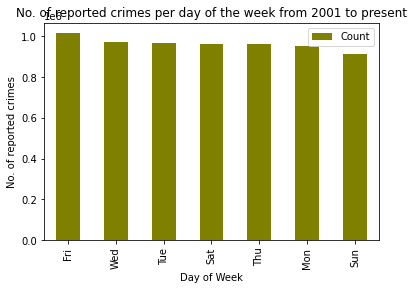

In [58]:
cp.sort_values('Count', ascending=False).plot(kind='bar', x='Day of Week', y='Count', color='olive')
plt.xlabel('Day of Week')
plt.ylabel('No. of reported crimes')
plt.title('No. of reported crimes per day of the week from 2001 to present')

# RDD - Resilient Distributed Dataset
Every code compiles down to RDDs which are immutable partitions of records that can be worked in parallel. It means RDD are Scala, Java or Python objects.

Spark doesn't understant the inner structure of your record. You'll need to manually recreate any optimizations.

__Performance__ :

- Similar to running user-defined functions row by row
- Python and Scala DF have similar performances
 
 It's recommend to stick with the high level API in spark and use RDD only when necessary.

 When to use RDDs:

 - For control over the physical distribution and partitioning of data
 - When maintaining a legacy codebase writtent using RDDs


In [62]:
ps_header = ps.first()
ps_header

Row(DISTRICT='Headquarters', DISTRICT NAME='Headquarters', ADDRESS='3510 S Michigan Ave', CITY='Chicago', STATE='IL', ZIP='60653', WEBSITE='http://home.chicagopolice.org', PHONE=None, FAX=None, TTY=None, X COORDINATE='1177731.401', Y COORDINATE='1881697.404', LATITUDE='41.83070169', LONGITUDE='-87.62339535', LOCATION='(41.8307016873, -87.6233953459)', Format_district='Hea')

In [63]:
ps_rest = ps.rdd.filter(lambda line: line != ps_header)
ps_rest.first()

Row(DISTRICT='18', DISTRICT NAME='Near North', ADDRESS='1160 N Larrabee St', CITY='Chicago', STATE='IL', ZIP='60610', WEBSITE='http://home.chicagopolice.org/community/districts/18th-district-near-north/', PHONE='312-742-5870', FAX='312-742-5771', TTY='312-742-5773', X COORDINATE='1172080.029', Y COORDINATE='1908086.527', LATITUDE='41.90324165', LONGITUDE='-87.64335214', LOCATION='(41.9032416531, -87.6433521393)', Format_district='018')

How many police stations are there?

In [ ]:
ps_rest.map(lambda line: line.split(',')).collect()
ps_rest.map(lambda line: line.split(',')).count()

Display the Disctrict ID, District name, Address and Zip for the plice station with District ID 7

In [ ]:
# zip is column nb 5 (starting from 0)
(ps_rest.filter(lambda line: line.split(',')[0] == 7)).
  map(lambda line: (line.split('')[0],
                    line.split('')[1],
                    line.split('')[2],
                    line.split('')[5]
                    )).collect()

Police staztions 10 and 11 are geographically close to each other. Display the Disctrict ID, District name, adress and zip code.

In [ ]:
 ps_rest.filter(lambda line: line.split(',')[0] in ['10', '11']).
  map(lambda line: (line.split(',')[1]
                    line.split(',')[2],
                    line.split(',')[5])).collect()